In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
file_path = "C:/Users/user/Desktop/NPL Section 2 Assignment/Reviews Dataset - NLP Assignment.csv"
df = pd.read_csv(file_path)

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df = df.rename(columns={"text_": "text"})

label_map = {"OR": "human", "CG": "ai"}
df["target"] = df["label"].map(label_map)

df[["category", "rating", "label", "target", "text"]].head()

,category,rating,label,target,text
0,Home_and_Kitchen_5,5,CG,ai,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,ai,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,ai,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,ai,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,ai,Very nice set. Good quality. We have had the s...


In [7]:
df["target"].value_counts()

target
ai       20216
human    20216
Name: count, dtype: int64

In [8]:
#remove duplicates

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 12
Duplicates after: 0


In [9]:
df["length_chars"] = df["text"].str.len()
df["length_words"] = df["text"].str.split().str.len()

df[["text", "target", "length_chars", "length_words"]].head()

,text,target,length_chars,length_words
0,"Love this! Well made, sturdy, and very comfor...",ai,75,12
1,"love it, a great upgrade from the original. I...",ai,80,16
2,This pillow saved my back. I love the look and...,ai,67,14
3,"Missing information on how to use it, but it i...",ai,81,17
4,Very nice set. Good quality. We have had the s...,ai,85,18


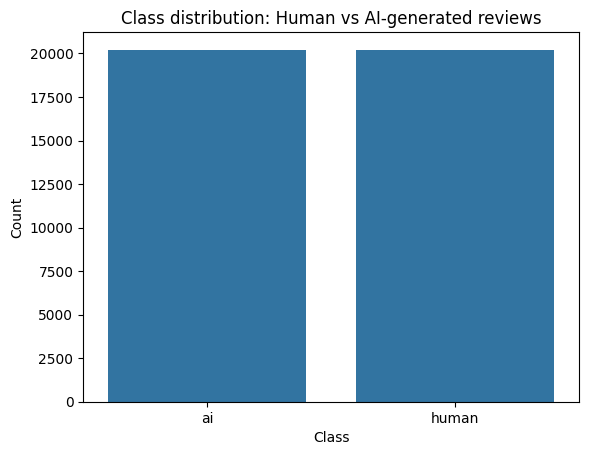

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="target")
plt.title("Class distribution: Human vs AI-generated reviews")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

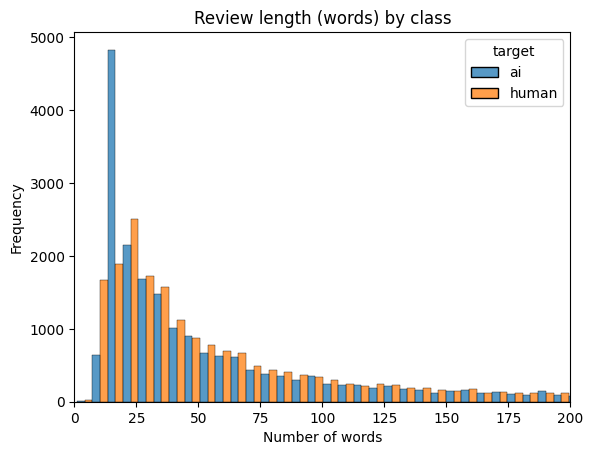

In [11]:
sns.histplot(
    data=df,
    x="length_words",
    hue="target",
    bins=60,
    multiple="dodge"   
)

plt.xlim(0, 200)  
plt.title("Review length (words) by class")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df["text"]      
y = df["target"]    

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    
    stratify=y          
)

len(X_train), len(X_test)

(32336, 8084)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
def train_and_evaluate(clf, name):
    # Pipeline: TF-IDF -> classifier
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(
            stop_words="english",
            max_df=0.9,
            min_df=5
        )),
        ("clf", clf),
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = pipe.predict(X_test)
    
    # Metrics
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=pipe.classes_)
    disp.plot()
    plt.title(name)
    plt.show()
    
    return pipe

=== Multinomial Naive Bayes ===
              precision    recall  f1-score   support

          ai       0.81      0.90      0.85      4041
       human       0.89      0.79      0.84      4043

    accuracy                           0.85      8084
   macro avg       0.85      0.85      0.85      8084
weighted avg       0.85      0.85      0.85      8084



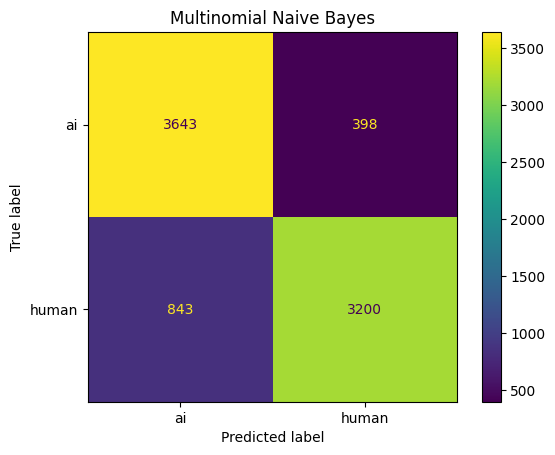

In [15]:
# Multinomial Naive Bayes
nb_model = train_and_evaluate(
    MultinomialNB(),
    "Multinomial Naive Bayes"
)

=== Logistic Regression ===
              precision    recall  f1-score   support

          ai       0.88      0.85      0.86      4041
       human       0.86      0.88      0.87      4043

    accuracy                           0.87      8084
   macro avg       0.87      0.87      0.87      8084
weighted avg       0.87      0.87      0.87      8084



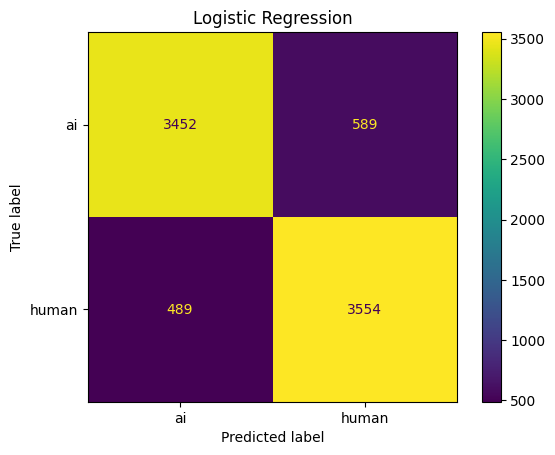

In [16]:
#Logistic Regression
lr_model = train_and_evaluate(
    LogisticRegression(max_iter=1000, n_jobs=-1),
    "Logistic Regression"
)

=== Linear SVM (LinearSVC) ===
              precision    recall  f1-score   support

          ai       0.86      0.88      0.87      4041
       human       0.88      0.86      0.87      4043

    accuracy                           0.87      8084
   macro avg       0.87      0.87      0.87      8084
weighted avg       0.87      0.87      0.87      8084



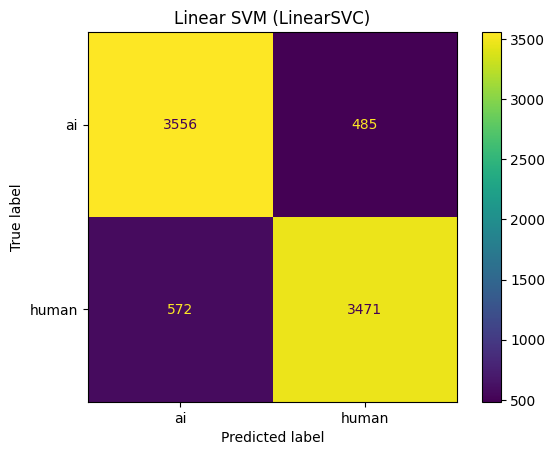

In [17]:
#Linear SVM (LinearSVC)
svm_model = train_and_evaluate(
    LinearSVC(),
    "Linear SVM (LinearSVC)"
)

In [18]:
#hyper parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [19]:
#hyperparameter tuning for NB

from sklearn.naive_bayes import MultinomialNB

nb_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", MultinomialNB()),
])

param_grid_nb = {
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [1, 5],
    "tfidf__max_df": [0.8, 0.9],
    "clf__alpha": [0.1, 0.5, 1.0]
}

grid_nb = GridSearchCV(
    nb_pipe,
    param_grid_nb,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_nb.fit(X_train, y_train)

print("Best NB params:", grid_nb.best_params_)
print("Best NB CV macro-F1:", grid_nb.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best NB params: {'clf__alpha': 0.1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}
Best NB CV macro-F1: 0.879579994944946


=== Tuned Multinomial NB on test set ===
              precision    recall  f1-score   support

          ai       0.90      0.87      0.88      4041
       human       0.87      0.90      0.89      4043

    accuracy                           0.88      8084
   macro avg       0.89      0.88      0.88      8084
weighted avg       0.89      0.88      0.88      8084



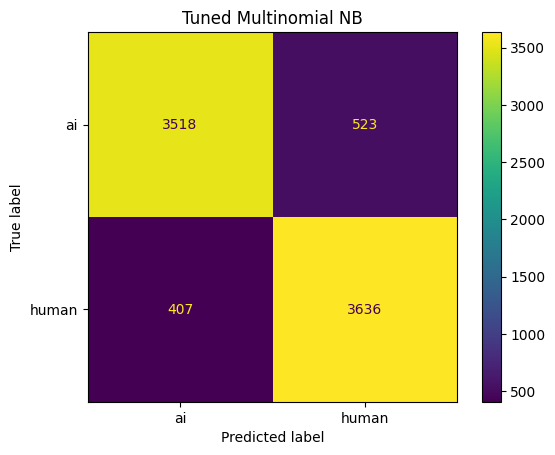

In [20]:
#Evaluating NB with best params on test set

best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

print("=== Tuned Multinomial NB on test set ===")
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb, labels=best_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_nb.classes_)
disp.plot()
plt.title("Tuned Multinomial NB")
plt.show()


In [21]:
#hyperparameter tuning for LR

from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="liblinear",   # good for small-ish binary problems
        n_jobs=-1
    )),
])

param_grid_lr = {
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [2, 5],
    "tfidf__max_df": [0.8, 0.9],
    "clf__C": [0.5, 1, 2]
}

grid_lr = GridSearchCV(
    lr_pipe,
    param_grid_lr,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_train, y_train)

print("Best LR params:", grid_lr.best_params_)
print("Best LR CV macro-F1:", grid_lr.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Best LR params: {'clf__C': 2, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}
Best LR CV macro-F1: 0.8870742816713865


=== Tuned Logistic Regression on test set ===
              precision    recall  f1-score   support

          ai       0.90      0.89      0.90      4041
       human       0.89      0.90      0.90      4043

    accuracy                           0.90      8084
   macro avg       0.90      0.90      0.90      8084
weighted avg       0.90      0.90      0.90      8084



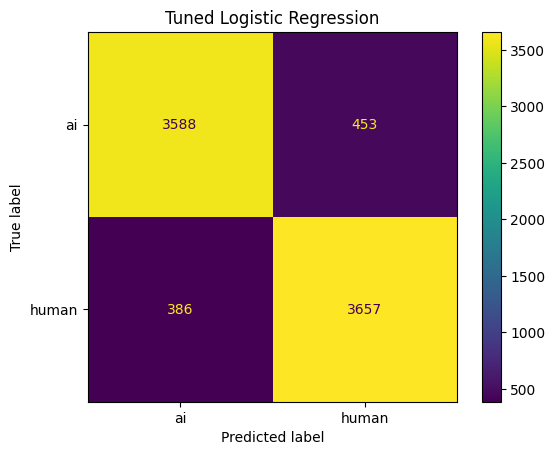

In [22]:
#evaluating LR with best params on test set

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print("=== Tuned Logistic Regression on test set ===")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_lr.classes_)
disp.plot()
plt.title("Tuned Logistic Regression")
plt.show()


In [23]:
#hyperparameter tuning for SVM

from sklearn.svm import LinearSVC

svm_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LinearSVC()),
])

param_grid_svm = {
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [2, 5],
    "tfidf__max_df": [0.8, 0.9],
    "clf__C": [0.5, 1, 2]
}

grid_svm = GridSearchCV(
    svm_pipe,
    param_grid_svm,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("Best SVM CV macro-F1:", grid_svm.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best SVM params: {'clf__C': 1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best SVM CV macro-F1: 0.8941923431565549


=== Tuned Linear SVM on test set ===
              precision    recall  f1-score   support

          ai       0.91      0.90      0.90      4041
       human       0.90      0.91      0.90      4043

    accuracy                           0.90      8084
   macro avg       0.90      0.90      0.90      8084
weighted avg       0.90      0.90      0.90      8084



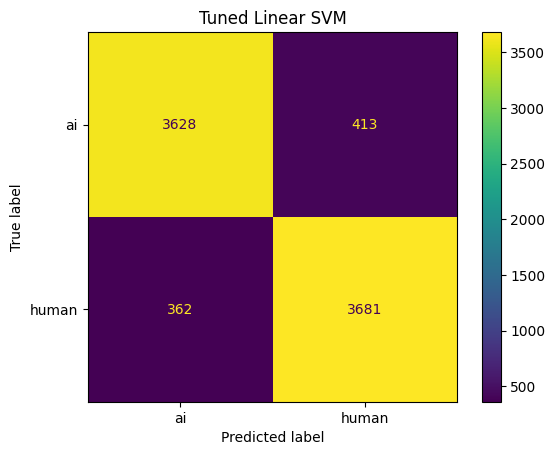

In [24]:
#evaluate svm with best params on test set

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("=== Tuned Linear SVM on test set ===")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_svm.classes_)
disp.plot()
plt.title("Tuned Linear SVM")
plt.show()


In [25]:
#compare tuned models

from sklearn.metrics import accuracy_score, f1_score

results = {
    "Tuned NB": {
        "accuracy": accuracy_score(y_test, y_pred_nb),
        "f1_macro": f1_score(y_test, y_pred_nb, average="macro")
    },
    "Tuned LR": {
        "accuracy": accuracy_score(y_test, y_pred_lr),
        "f1_macro": f1_score(y_test, y_pred_lr, average="macro")
    },
    "Tuned SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "f1_macro": f1_score(y_test, y_pred_svm, average="macro")
    }
}

results


{'Tuned NB': {'accuracy': 0.8849579416130628, 'f1_macro': 0.8849334249933101},
 'Tuned LR': {'accuracy': 0.8962147451756556, 'f1_macro': 0.8962071835901332},
 'Tuned SVM': {'accuracy': 0.9041316180108857, 'f1_macro': 0.9041274971002665}}

In [26]:
import joblib

# save the tuned SVM model
joblib.dump(best_svm, "best_fake_review_svm.joblib")


['best_fake_review_svm.joblib']

In [27]:
def test_review(text):
    pred = best_svm.predict([text])[0]
    print("TEXT (first 300 chars):")
    print(text[:300], "...\n")
    print("Model prediction:", pred)


In [38]:
test_review(
    "I was looking for a product that would be reliable enough for everyday use without being overly complicated, and this one fits that description very well. The packaging was secure, there were no missing parts, and the initial installation was surprisingly quick. I appreciate that the manufacturer kept the interface straightforward instead of adding too many unnecessary options. During normal use, it has functioned consistently and has not required any troubleshooting or technical support. It feels like the kind of product you can set up once and then mostly forget about because it just keeps working. For the cost, I think it offers very good value and I would definitely purchase it again."
    )


TEXT (first 300 chars):
I was looking for a product that would be reliable enough for everyday use without being overly complicated, and this one fits that description very well. The packaging was secure, there were no missing parts, and the initial installation was surprisingly quick. I appreciate that the manufacturer ke ...

Model prediction: human


In [39]:
vec = best_svm.named_steps["tfidf"]   
clf = best_svm.named_steps["clf"]     

feature_names = vec.get_feature_names_out()
print("Classes:", clf.classes_)


Classes: ['ai' 'human']


In [40]:
import numpy as np

coefs = clf.coef_[0]  # shape: (n_features,)

# if classes_ prints ['ai' 'human'], then:
ai_class = clf.classes_[0]
human_class = clf.classes_[1]

# indices sorted by coefficient value
sorted_idx = np.argsort(coefs)

# most negative = strongest toward ai
top_ai_idx = sorted_idx[:20]
# most positive = strongest toward human
top_human_idx = sorted_idx[-20:]

print(f"Top words pushing towards '{ai_class}':")
for i in top_ai_idx:
    print(feature_names[i], coefs[i])

print("\nTop words pushing towards '{human_class}':")
for i in reversed(top_human_idx):
    print(feature_names[i], coefs[i])


Top words pushing towards 'ai':
reason gave -3.2953145256845064
admit -3.108526767382105
reason -2.8762847426042413
problem kind -2.835404725479943
problem really -2.761784138189308
couple -2.7389303641604945
wide -2.676435473907651
downside -2.661455921614249
replace -2.6521165293582865
did need -2.4316238737870677
little smaller -2.4107465173810594
just starting -2.4101913443892955
bought friend -2.3852825658443644
materials -2.3271305993877216
definitely buying -2.2971140097810263
love feel -2.264714022130683
story told -2.245344153556705
nice bag -2.2279409144842934
problem -2.1597397305905166
quality just -2.086627060065799

Top words pushing towards '{human_class}':
actually 1.8852178393013912
plus 1.823638513506321
instead 1.800761429546564
far 1.7728004153303585
end 1.7416290230622817
easily 1.7320413543796185
soon 1.6868163573711654
right 1.648779791245162
coming 1.6472432990759172
away 1.6393923298363966
times 1.614612725156569
really 1.6089780748229867
ago 1.6016184995381135

In [41]:
def explain_review(text, top_n=10):
    vec = best_svm.named_steps["tfidf"]
    clf = best_svm.named_steps["clf"]
    feature_names = vec.get_feature_names_out()
    classes = clf.classes_
    coefs = clf.coef_[0]

    # transform text to TF-IDF vector
    X = vec.transform([text])
    # convert sparse to dense for simplicity
    x_vec = X.toarray()[0]

    # contribution of each feature = tfidf * weight
    contributions = x_vec * coefs

    # sort indices by contribution
    sorted_idx = contributions.argsort()

    # top words pushing towards classes_[1]
    top_pos = sorted_idx[-top_n:]
    # top words pushing towards classes_[0]
    top_neg = sorted_idx[:top_n]

    pred = clf.predict(X)[0]
    print("Predicted class:", pred)
    print("\nTop words pushing towards", classes[1], "(positive contributions):")
    for i in reversed(top_pos):
        if x_vec[i] != 0:
            print(f"{feature_names[i]:20s}  contrib={contributions[i]:.4f}")

    print("\nTop words pushing towards", classes[0], "(negative contributions):")
    for i in top_neg:
        if x_vec[i] != 0:
            print(f"{feature_names[i]:20s}  contrib={contributions[i]:.4f}")


In [42]:
sample_text = """I decided to purchase this product after reading several positive comments online..."""
explain_review(sample_text)


Predicted class: human

Top words pushing towards human (positive contributions):
positive              contrib=0.3719
comments              contrib=0.2935
online                contrib=0.2446
purchase              contrib=0.0856
purchase product      contrib=0.0195
product               contrib=0.0192

Top words pushing towards ai (negative contributions):
decided purchase      contrib=-0.5622
decided               contrib=-0.1081
reading               contrib=-0.0355
